# Lecture 3: Manipulating & Plotting 1D fMRI Arrays: Voxel Time Series

## Goals

- **Neuroscience / Neuroimaging concepts**
    - Types of fMRI Data Arrays
- **Datascience / Coding concepts**
    - Time series data
    - 1D arrays as voxel time series data
    - Subsetting 1D arrays: Slicing and Indexing
    - Descriptive statistics on 1D arrays
    - Visualizing 1D arrays: Line plots, Histograms and Bar plots

# Key Terms and Concepts
<br/>

Below is a list of the key terms and concepts you should know after this lecture. The list below are links to the sections of the notebook where you can learn more about each term/concept.

<br/>
<div style="font-size:15pt;">
    
1. [What can arrays represent?](#Data_Representation) <br/>
2. [fMRI Data array representations](#fMRI_Data_Representation) <br/>
5. [Indexing](#Indexing) <br/>
6. [Slicing](#Slicing) <br/>
7. [Descriptive Statistics](#Descriptive_Statistics) <br/>
8. [Line Plots](#Line_Plots) <br/>
9. [Axis Labels](#Axis_Labels) <br/>
10. [Plot Title](#Plot_Title) <br/>
11. [Histograms](#Histograms) <br/>
12. [`np.reshape`](#reshape) <br/>
13. [Bar Plots](#Bar_Plots) <br/>
</div>

# Standard imports

Here we'll import the modules that we've already used in class that we need for this lecture. Any new modules we introduce in class will be imported where we use them.

In [1]:
import numpy as np
import nibabel

# Review

## Arrays, Lists and Tuples

Last week we learned about arrays, lists and tuples, which are 3 types of containers that are data types which hold other data. While they have a lot of similarities, there are also important differences between them that make them useful in different scenarios. To outline the main differences between them, let's first create one of each, containing the same thing, 5 ones.

In [2]:
array_ones = np.ones(5, dtype='int')
print(array_ones)
list_ones = [1,1,1,1,1]
print(list_ones)
tuple_ones = (1,1,1,1,1)
print(tuple_ones)

[1 1 1 1 1]
[1, 1, 1, 1, 1]
(1, 1, 1, 1, 1)


We learned the terms **mutable** and **immutable** last lecture. What do those mean and how do they apply to arrays, lists and tuples?

**Mutable** means that the what's stored inside the container can change. This can happen by adding a new value, deleting an existing value, or changing a value.

**Immutable** is just the opposite, once the container is created it can't change what it contains.

So which of these 3 container types are mutable and which are immutable? Let's use some code to answer that. We'll be jumping ahead in lecture a bit by using a technique called `indexing`. This let's you reference an element in a container using square brackets `[]`. Without getting into detail here, the below code is meant to change the value of the first element in these containers to 10:

In [3]:
array_ones[0] = 10
print(array_ones)

[10  1  1  1  1]


In [4]:
list_ones[0] = 10
print(list_ones)

[10, 1, 1, 1, 1]


In [5]:
tuple_ones[0] = 10
print(tuple_ones)

TypeError: 'tuple' object does not support item assignment

So we see that arrays and lists are **mutable**, but tuples are **immutable** since we got an error when trying to change the value of the first element.

For this reason lists and arrays are useful when you know you'll be changing what's contained in it, while tuples are useful when you know the data inside won't change. 

Doing mathematics on a data set is the core of what data science is all about, and these 3 containers differ in whether they support mathematical operations. Let's see:

In [6]:
array_ones + 5

array([15,  6,  6,  6,  6])

In [7]:
list_ones + 5

TypeError: can only concatenate list (not "int") to list

In [8]:
tuple_ones + 5

TypeError: can only concatenate tuple (not "int") to tuple

So arrays support mathematical operations, but lists and tuples don't. That's why we'll be using arrays in this class to work with and analyze fMRI data!

## Loading files

We learned 2 ways to load data into memory. The first is `np.load` which load `npy` files that contain numpy arrays. We'll be using this to load arrays that describe the types of stimuli used in the fMRI experiments we'll study in this course. 

First, we'll download the file to load. You don't need to know how this works, but in homework or exams we may ask you to simply run a cell, which will download a file you need for you. The file is downloaded to your datahub account, and you can see it using the datahub file browser, which we'll have a look at after this file is downloaded.

In [9]:
import os
import urllib.request
url_npy = 'https://berkeley.box.com/shared/static/6y3h0bk2fvfdlelvcq1y0mnqzdwl7rrm.npy'
filename_npy = os.path.expanduser('~/experiment_design_run1.npy')
_ = urllib.request.urlretrieve(url_npy, filename_npy)

Now let's check the datahub file browser. To do this, open a new web browser window, and go to: `datahub.berkeley.edu`. From there you'll see a list of folders and filenames, which are all links. Simply click on the link of a folder to enter that folder, or a file to open the file. You should see the file we just downloaded in your `home` folder, which is `/home/jovyan`, and which is what is open when you first login. Make sure you see the file `experiment_design_run1.npy` now.

Now we'll load that file using `np.load`

In [10]:
experiment_design = np.load(filename_npy)
experiment_design.shape

(120, 5)

The second way to load data that we learned was using `nibabel.load` to load nifti files, which contain fMRI data. Remember that with `nibabel.load` there is a two step process to get the data. First, you load the header containing the meta-data for the file (things like the location of the data in 3-D space) using `nibabel.load`. Then you get the data using `get_data`. Let's have a look:

In [11]:
filename_nifti = os.path.expanduser('/home/michael/Downloads/s01_categories_01.nii')
hdr = nibabel.load(filename_nifti)
data = hdr.get_data().T
data.shape

(120, 30, 100, 100)

<a id='Data_Representation'></a>
# What can arrays represent?

Last lecture we learned about numpy N-D arrays. These are containers that hold the same type of data (float, int, boolean, etc.), are "rectangular" in shape and can have any number of dimensions. They are the basis of fMRI data storage and analysis. It is useful to think of any data stored in an array as lying along two different criteria, because these criteria constrain the types of operations and statistics we will perform on them. They can be formulated as questions:

1. Do all the data points in the array represent the same kind of measurement?

 - For example, fMRI data does represent the same kind of measurement, because it is quantifying the BOLD signal across brain location and time.
 - The `Tables` used in the data8 class may represent different kinds of measurements per column (e.g. age, weight, height), even though their data type may be the same (e.g. `float`) making them representable as a numpy array.
 -  As we will see later in the class, when we analyze fMRI data we are interested in how much a given voxel responds to the types of stimuli or tasks in our experiment. These responses are quantified, and are called `weights`. Since they are measuring the response of a voxel to different types of stimuli or task, they are not similar measurements.


2\. If the data points do represent the same kind of measurement: Are the measurements intrinsically ordered?

 - For example, 1D arrays representing BOLD fMRI time series have temporal ordering: Each entry represents the BOLD signal as time increases.
 - The rows of a data science table represent different samples that do not necessarily have any intrinsic ordering. This means that you can shuffle the rows without changing the meaning of the data. However, this does not mean that they do not need unique labels.

The answers to the questions reveal that arrays can represent 3 diffferent meta-types of data:

1. **Dissimilar measurements**: Answer no to question #1
2. **Similar ordered measurements**: Answer yes to question #1 and question #2.
3. **Similar unordered measurements**: Answer yes to question #1 and no to question #2.

<a id='fMRI_Data_Representation'></a>
# fMRI Data Array Representations

Every dimension of an fMRI data array represents data that is of one of the 3 meta-types mentioned above.  When we load fMRI data, it is  in a 4-D array. It is often useful to get subsets of the data for different visualization and analyses we want to do. Although there are no hard-set rules about what the data stored in a specifically shaped array represents, there are guidelines that are very useful when working with fMRI data. The type of manipulation, visualization or analysis done on a specific array depends entirely on what it represents, and these guidelines help you to infer what the data represents just from knowing the shape.

The representations of fMRI Data Arrays we'll use in this class are:

* **Voxel Timeseries** - *[1D]*: An ordered series of BOLD data which represents the value of a voxel at each point in time during a scan. As long as a scan. Plotted using line plots or histograms.
* **Collection of Voxel Timeseries** - *[2D]*:  SImply 2 or more voxel timeseries. Can be plotted together in line plots or histrograms.
* **Axial, Saggital or Coronal Slice** - *[2D]*: One slice through a single 3D volume representing the BOLD data at a single time point for part of the brain. Plotted as standard 2-D images.
* **Volume or TR** - *[3D]*: Represents the entire brain, contains all the BOLD data collected for a single time point. Plotted using multiple 2D images or flatmaps or 3D interactive plots.
* **Scan or Run** - *[4D]*: All the 3D volumes collected during a run. Also, all of the voxel timeseries since a voxel timeseries is as long as a run. These are not plotted. They are read in from disk and subsetted for visualization, or just analyzed directly.

# 1D Array (Time Series) Manipulation

Let's now take a closer look at 1-D arrays and how to manipulate them. First we'll cover the basics using some simple 1-D arrays, and then we'll work with real 1-D fMRI time series data.

## Subsetting
There are three main ways of subsetting 1-D arrays to access and modify values of the array:
1. **indexing** is the use of a list or array of integers to determine which entries to select
2. **slicing** consists in selecting a subarray with regularly spaced entries

Each of these have specific usecases, advantages and disadvantages. Both of these techniques will also apply to multidimensional arrays, which we're going to learn in the next two lectures.

<a id='Indexing'></a>
## Indexing

Indexing is the use of integer numbers as indices to access one or several array values:

Let's define an array to use while learning about indexing:

In [12]:
ten_twenty_range = np.arange(10, 20)
ten_twenty_range = ten_twenty_range.astype('float32')

In [13]:
ten_twenty_range

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.], dtype=float32)

Now let's select the element with index 1. This is the **second** element!

**NOTE**: As stated during the last lecture, indexing in numpy arrays starts at 0. This is why the index 1 is the second index of the array.

In [14]:
ten_twenty_range[1]

11.0

In the same way, we can select the **5th** element using index `4` :

In [15]:
ten_twenty_range[4]

14.0

The above indices count the array entries from the **start of the array**. It is also possible to index from the **end of the array**. This is achieved by using negative integers as indices. The last element of the array has index  `-1`:

In [16]:
ten_twenty_range[-1]

19.0

But we can also get several values if we present the indices that we want as a list, a tuple, or an array:

In [17]:
indices = [0, 2, 3]
ten_twenty_range[indices]

array([ 10.,  12.,  13.], dtype=float32)

Indices can be `list`s or `tuple`s or `array`s themselves. So we can use what we have learned about creating arrays to obtain sophisticated indexing arrays:

In [18]:
indices = np.arange(1, 7, 2)
indices, ten_twenty_range[indices]

(array([1, 3, 5]), array([ 11.,  13.,  15.], dtype=float32))

One of the strengths of indexing over other subsetting methods is that you can obtain multiple copies of the same data point by repeating the same index value.

You can arbitrarily rearrange the data from the original array by placing the indices out of the original order.

Lists of indices can be a mixture of positive and negative numbers to be able to index from both sides of the array.

Because of these features, indexing always creates a **copy** of the original data array.

In [19]:
indices = [1, 3, 1, 1, 2, 2, -1, -2, -3]
ten_twenty_range[indices]

array([ 11.,  13.,  11.,  11.,  12.,  12.,  19.,  18.,  17.], dtype=float32)

Indexing does not work on lists:

In [20]:
ten_twenty_list = list(ten_twenty_range)
ten_twenty_list

[10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0]

In [21]:
ten_twenty_list[indices]

TypeError: list indices must be integers or slices, not list

#### Assignment using indices
We can also use indexing to assign values to arrays. We do this by indexing as above, then using the assignment operator `=` to set the values.

Let's start a fresh array! Let's make an array of 10 zeros, and then set indices 1, 3 and 8 to 15

In [22]:
indexing_assign_arr = np.zeros(10)
print(indexing_assign_arr)

indexing_assign_arr[[1, 3, 8]] = 15
print(indexing_assign_arr)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[  0.  15.   0.  15.   0.   0.   0.   0.  15.   0.]


Above we set all of the selected array entries to the same value. However, we can also set every one of the selected entries to a different value, by providing exactly as many values as we have chosen to index.

Let's set indices 2, 4, 6, and 7 to 8, 9, 10, 11 respectively.

In [23]:
indexing_assign_arr[[2, 4, 6, 7]] = np.array((8, 9, 10, 11))
print(indexing_assign_arr)

[  0.  15.   8.  15.   9.   0.  10.  11.  15.   0.]


It often happens that we would like to fill parts of an array with values from other parts of the array. For example, here we may want to fill indices `[0, 5, -1]` with the values from indices `[1, 2, 3]`. We can write this assignment as follows:

In [24]:
indexing_assign_arr[[0, 5, -1]] = indexing_assign_arr[[1, 2, 3]]
print(indexing_assign_arr)

[ 15.  15.   8.  15.   9.   8.  10.  11.  15.  15.]


#### Breakout session

- Create a range from 100 to 200 in steps of 9, call it `breakout`, and print it.
- Using indexing, extract the last element and print it
- Using indexing, extract the second element and print it
- Using indexing, extract the second to last, the first, and the element with index 5 three times in a row. (**HINT:** The result should have five entries)
- Assign the value `999` to the elements with indices `1, 3, 2, -1` of the `breakout` array.
- Use `np.arange()` to create a range of indices from 5 to 9, and set the elements to which those indices refer to a range from 500 to 900 with steps of 100.
- Extra credit (not really): swap the first and last elements of the array.

In [25]:
### Student Answer
breakout = np.arange(100, 200, 9)
print(breakout)

print(breakout[-1])

print(breakout[1])

print(breakout[[-2, 0, 5, 5, 5]])

breakout[[1, 3, 2, -1]] = 999
print(breakout)

indices = np.arange(5, 9)
breakout[indices] = np.arange(500, 900, 100)
print(breakout)

tmp = breakout[0]
breakout[0] = breakout[-1]
breakout[-1] = tmp
print(breakout)

breakout[[0, -1]] = breakout[[-1, 0]]
print(breakout)

breakout[0], breakout[-1] = breakout[-1], breakout[0]
print(breakout)

[100 109 118 127 136 145 154 163 172 181 190 199]
199
109
[190 100 145 145 145]
[100 999 999 999 136 145 154 163 172 181 190 999]
[100 999 999 999 136 500 600 700 800 181 190 999]
[999 999 999 999 136 500 600 700 800 181 190 100]
[100 999 999 999 136 500 600 700 800 181 190 999]
[999 999 999 999 136 500 600 700 800 181 190 100]


<a id='Slicing'></a>
## Slicing

Array slicing is a technique to select parts of an array. They have a starting point and an end point. One can also specify a step size.

**Array slicing** is done using a combination of the `[]` operators (pronounced **square brackets**) along with numbers and the `:` operator (pronounced **colon**). To get a slice from a 1-D array, you add the **square brackets** after the **name**. You then indicate which values you want from the data, using a combination of number(s) and/or the `:`. Here is a simple example to get a continuous range: 

Remember `ten_twenty_range`? Let's take a look at it again, along with its shape:

In [26]:
ten_twenty_range.shape, ten_twenty_range

((10,),
 array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.], dtype=float32))

Now let's begin by slicing values 3 to 6. This will return the elements from the 4th up to, but not including the 7th position of the array.

In [27]:
ten_twenty_range[3:6]

array([ 13.,  14.,  15.], dtype=float32)

An important thing to note is that the right-hand side of a slice, here 6, is **excluded** from the slice, so we don't see the element with the index 6, here 16. The left-hand side is always **included**.

This is exactly the same behavior that `np.arange` has.

How to think about this: If you use `3:6` as slice parameters, you will get `6 - 3 = 3` elements!

Let's select the first five elements of the array `ten_twenty_range`, by using the slice `0:5`.

In [28]:
ten_twenty_range[0:5]

array([ 10.,  11.,  12.,  13.,  14.], dtype=float32)

Question: How do we select the other half of the array, if the right-hand side index is exclusive?

We might think that because the index `10` is out of bounds if used in indexing, that we cannot use it here, either.

In [29]:
ten_twenty_range[10] # index 10 is out of bounds

IndexError: index 10 is out of bounds for axis 0 with size 10

But since slicing is *exclusive* on the endpoint, we *can* use 10 here. In fact, if we used 9, we would end up one value short! (Because `9 - 5 = 4`!)

In [30]:
ten_twenty_range[5:9] # there is one missing

array([ 15.,  16.,  17.,  18.], dtype=float32)

In [31]:
ten_twenty_range[5:10] # here we get all of them

array([ 15.,  16.,  17.,  18.,  19.], dtype=float32)

What if we didn't know how many elements there are left, and would just like to have all the array elements, starting from index 5?

In [32]:
ten_twenty_range[5:None]

array([ 15.,  16.,  17.,  18.,  19.], dtype=float32)

An abbreviation for this, which we shall adopt, is to simply omit `None`, because it is the default value:

In [33]:
ten_twenty_range[5:]

array([ 15.,  16.,  17.,  18.,  19.], dtype=float32)

We can also use the same abbreviation to start from the beginning:

In [34]:
ten_twenty_range[0:5]

array([ 10.,  11.,  12.,  13.,  14.], dtype=float32)

In [35]:
ten_twenty_range[None:5]

array([ 10.,  11.,  12.,  13.,  14.], dtype=float32)

is the same as

In [36]:
ten_twenty_range[:5]

array([ 10.,  11.,  12.,  13.,  14.], dtype=float32)

What if we don't know the length of the array, but we would like to extract a subset of the array, starting at the beginning and going to the second to last element?

Like with **indexing**, we can use **negative numbers in slices**.

In [37]:
ten_twenty_range[:-2]

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.], dtype=float32)

**Note**: The `-2` here is with respect to the total length of the array. So it will evaluate to `10 - 2 = 8`. We can confirm this by indexing up to `8`. 

In [38]:
ten_twenty_range[:8]

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.], dtype=float32)

#### Slicing with step size different from 1
In general, slicing parameters are `start:stop:step`. We have just learned about `start` and `stop` for slicing. In order to complete our understanding, let's take a look at how to use `step` works in slicing. `step` in slicing is analogous to the third value we pass into `np.arange` when creating ranges. 


`step` gives us the possibility of specifying how we would like to walk through the array. For example, what if we wanted to have every third element from 2 to 8? Then we could write:

In [39]:
ten_twenty_range[2:8:3]

array([ 12.,  15.], dtype=float32)

What if we wanted every third element of the array, starting at 1? Using `None` as above to omit the stopping point (and thus go to the end), we can write

In [40]:
ten_twenty_range[1:None:3]

array([ 11.,  14.,  17.], dtype=float32)

or, abbreviated:

In [41]:
ten_twenty_range[1::3]

array([ 11.,  14.,  17.], dtype=float32)

For every third element starting at 0, we could abbreviate even more:

In [42]:
ten_twenty_range[::3]

array([ 10.,  13.,  16.,  19.], dtype=float32)

What if we put a **negative step**? We can then traverse the array backwards!

In [43]:
ten_twenty_range[2:8:-1]

array([], dtype=float32)

Huh, that didn't work as we might expect, we created an empty array! The result is empty because we chose the starting point to be before the end point, and then had a negative step, which goes backwards. If we want to go from index 8 to index 2 backwards, we need to make 8 the starting point and 2 the end point.

In [44]:
ten_twenty_range[8:2:-1]

array([ 18.,  17.,  16.,  15.,  14.,  13.], dtype=float32)

Let's start at 8 and go to the beginning:

In [45]:
ten_twenty_range[8:None:-1]

array([ 18.,  17.,  16.,  15.,  14.,  13.,  12.,  11.,  10.], dtype=float32)

Abbreviated:

In [46]:
ten_twenty_range[8::-1]

array([ 18.,  17.,  16.,  15.,  14.,  13.,  12.,  11.,  10.], dtype=float32)

#### Assigning using slicing

Now let's created another array of zeros and use slicing to assign values to it

In [47]:
slicing_assign_arr = np.zeros(10)
print(slicing_assign_arr)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


First let's assign the value 10 to every 5th element, starting at the first one (Index 0).

In [48]:
slicing_assign_arr[::5]

array([ 0.,  0.])

In [49]:
slicing_assign_arr[::5] = 10
print(slicing_assign_arr)

[ 10.   0.   0.   0.   0.  10.   0.   0.   0.   0.]


Now let's assign increasing values to the even indices of the array. This is a bit confusing, since indices begin with 0 in Python, the even indices refer to the odd entries of the array. So for example, indices 0,2,4,6,8 refer to the 1st, 3rd, 5th, 7th and 9th elements. In this class we will always refer to the indices being even or odd, NOT the entries of the array.

In [50]:
slicing_assign_arr[::2]

array([ 10.,   0.,   0.,   0.,   0.])

In [51]:
slicing_assign_arr[::2] = np.arange(5)
print(slicing_assign_arr)

[  0.   0.   1.   0.   2.  10.   3.   0.   4.   0.]


Now let's set all the odd indices to the value of 25. 

In [52]:
slicing_assign_arr[1::2]

array([  0.,   0.,  10.,   0.,   0.])

In [53]:
slicing_assign_arr[1::2] = 25
print(slicing_assign_arr)

[  0.  25.   1.  25.   2.  25.   3.  25.   4.  25.]


#### Breakout session

- Create a range from 20 to 40 in steps of 2, call it `breakout_slicing`, and print it.
- Using slicing, extract the even elements from `breakout_slicing` and print them
- Using slicing, extract the odd elements from `breakout_slicing` and print them
- Using slicing, extract the first half of the elements from `breakout_slicing` and print them. **HINT** you can use the function `len` to find the length of a 1-D array, list or tuple. The first half is just the length divided by 2.
- Using slicing, extract the last 3 elements from `breakout_slicing` and print them
- Assign the value `42` to the elements with indices divisible by 3.
- Use `np.arange()` to create a range of values from -1 to -7 inclusive, and store them into the last 7 elements of the array.

In [54]:
### Student answer
breakout_slicing = np.arange(20, 40, 2)
print(breakout_slicing)

print(breakout_slicing[::2])
print(breakout_slicing[1::2])
print(breakout_slicing[:5])
print(breakout_slicing[:len(breakout_slicing) // 2])
print(breakout_slicing[-3:])
breakout_slicing[::3] = 42
print(breakout_slicing)
breakout_slicing[-7:] = np.arange(-1, -8, -1)
#breakout_slicing[:-8:-1] = np.arange(-7, 0)
print(breakout_slicing)

[20 22 24 26 28 30 32 34 36 38]
[20 24 28 32 36]
[22 26 30 34 38]
[20 22 24 26 28]
[20 22 24 26 28]
[34 36 38]
[42 22 24 42 28 30 42 34 36 42]
[42 22 24 -1 -2 -3 -4 -5 -6 -7]


In [55]:
np.arange(-1, -8, -1)

array([-1, -2, -3, -4, -5, -6, -7])

## Summary: Slicing versus Indexing

Both slicing and indexing can be used to retrieve and write to subsets of an array, but there are some big differences between the two. Here's a list of the biggest differences:

- Indexing returns a copy of the data, while slicing returns a **view** on the original data. Thus, modifying the array output of slicing modifies the original data, while modifying the array ouput of indexing just modifies the copy.

In [56]:
# create an array
a=np.arange(10)
print(a)
# use indexing to get the first 3 values
b = a[[0,1,2]]
b[:] = 10
print(a)
print(b)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[10 10 10]


In [57]:
# now use slicing to get a "view" and modify that
c=a[:3]
c[:] = 10
print(a)
print(c)

[10 10 10  3  4  5  6  7  8  9]
[10 10 10]


- Indexing can retrieve multiple copies of the same element into the output array, while slicing always retrieves just one copy of the selected elements.

In [58]:
a = np.arange(10)
b = a[[2,2,2,2]]
print(a)
print(b)

[0 1 2 3 4 5 6 7 8 9]
[2 2 2 2]


- Slicing always retrieves elements with a regular step size, while indexing doesn't have to have any pattern at all.

In [59]:
a = np.arange(10)
b = a[[8,4,7,1,2]]
c = a[:6:2]
print(a)
print(b)
print(c)

[0 1 2 3 4 5 6 7 8 9]
[8 4 7 1 2]
[0 2 4]


<a id='Descriptive_Statistics'></a>
## Descriptive Statistics of the fMRI data

When dealing with a dataset, there are certain values we can look for that give us a summary of the dataset, or what it "looks" like. 

For example, let's say you are a scientist on a spaceship that is exploring an alien planet, and you discover a new life form. The first thing you might want to do is to measure the height of a number of specimens that you find (say 100 of them). If you wanted to convey to someone back home the size of these creatures, you might think to describe several things about their heights:
- The shortest one you found.
- The tallest one you found.
- The average height of all of them.

And so on. These kinds of values that we can calculate from a dataset are called **descriptive statistics**, and are a powerful way to get an idea of what your data "looks" like with just a few numbers. You will learn more about these in later Data 8 lectures, but it is useful for our purposes in this connector to discuss these now.

Before we calculate some descriptive statistics, let's first grab a sample voxel time series that we can summarize, and later visualize. To do that, we'll use `slicing` on the fMRI data that we loaded at the beginning of class. This is a bit of foreshadowing some of the ways we'll use `slicing` with fMRI data. We'll learn more about this in a couple of lectures, so don't worry about the details for now.

In [60]:
timeseries = data[:, 6, 57, 37]

Using the analogy of the shortest alien above, let's see how to find the smallest fMRI value in our time series using the `np.min()` function:

In [61]:
timeseries_min = np.min(timeseries)
print('The minimum value of the timeseries data is:', timeseries_min)

The minimum value of the timeseries data is: 406.285


Sometimes it's useful to get a summary of only a subset of an array. For example, when collecting fMRI data the scanner takes several seconds before it reaches something close to an equilibrium state. You can think of this as a "warming up" period. As such, the first few TRs from a scan (aka run) are often discarded. Let's use slicing to discard the first 5 TRs, and then find the average of the remaining data with `np.mean`.

In [62]:
timeseries_mean_no5 = np.mean(timeseries[5:])
print(timeseries_mean_no5)

430.619


Now just to illustrate what can be done with indexing, let's index this timeseries, but get the 10th element 100 times in a row. Then take the mean of this new array. What do you think the mean of this new array will be?

First, let's create the indices, which should be a list containing 10 repeated 100 times. There is a simple way to do this in Python. Simply create a list that contains one 10, and then multiply it by 100, which will create a new list that adds the original list (of a single 10) together 100 times.

In [63]:
indices_10s = [10] * 100
print(indices_10s)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


Now let's use that list of indices and find the mean...

In [64]:
timeseries_10_100times = timeseries[indices_10s]
print(timeseries_10_100times)

[ 440.76586914  440.76586914  440.76586914  440.76586914  440.76586914
  440.76586914  440.76586914  440.76586914  440.76586914  440.76586914
  440.76586914  440.76586914  440.76586914  440.76586914  440.76586914
  440.76586914  440.76586914  440.76586914  440.76586914  440.76586914
  440.76586914  440.76586914  440.76586914  440.76586914  440.76586914
  440.76586914  440.76586914  440.76586914  440.76586914  440.76586914
  440.76586914  440.76586914  440.76586914  440.76586914  440.76586914
  440.76586914  440.76586914  440.76586914  440.76586914  440.76586914
  440.76586914  440.76586914  440.76586914  440.76586914  440.76586914
  440.76586914  440.76586914  440.76586914  440.76586914  440.76586914
  440.76586914  440.76586914  440.76586914  440.76586914  440.76586914
  440.76586914  440.76586914  440.76586914  440.76586914  440.76586914
  440.76586914  440.76586914  440.76586914  440.76586914  440.76586914
  440.76586914  440.76586914  440.76586914  440.76586914  440.76586914
  440.

In [65]:
timeseries_10_100times_mean = np.mean(timeseries_10_100times)
print(timeseries_10_100times_mean)

440.766


#### Breakout Session

Now try to create some other descriptive statistics of our timeseries data.

- Using np.max, print the maximum value of the timeseries.
- Using np.median, print the middle value of the timeseries. 
- Using np.max, print the maximum value of the first half of the timeseries. **HINT** Remember the `len` function!
- Using np.median, print the middle value of the first half of the timeseries. 
- Using np.max, print the maximum value of the second half of the timeseries.
- Using np.median, print the middle value of the second half of the timeseries. 

In [66]:
### STUDENT ANSWER
print(np.max(timeseries))
print(np.median(timeseries))
print(np.max(timeseries[:len(timeseries) // 2]))
print(np.median(timeseries[:len(timeseries) // 2]))
print(np.max(timeseries[len(timeseries) // 2:]))
print(np.median(timeseries[len(timeseries) // 2:]))

458.919
431.045
452.182
428.569
458.919
432.797


# 1D Array (Time Series) Visualization

A useful way of inspecting arrays is to use our eyes. A good visualization of data in general will allow us to assess its contents easily. The type of visualization will strongly depend on what data the array represents, but also what aspect of the data is of interest to the scientist. Here we will introduce three simple types of data visualization for 1-D arrays:

1. **Line plots** These are plots of simple lines which show how the values of an array change as the index increases. These are useful when plotting *similar ordered* data, such as a time series.

2. **Histograms** These plots give frequencies (or counts) of the values in your array, broken into ranges of values. They are useful when plotting data that represents *similar* measurements, whether they are *ordered* or *unordered*. We'll also use these to summarize time series data now, and for other purposes later in the course.

3. **Bar plots** These plots look very similar to histograms, but are used to plot the magnitude of a set of values, one at a time. These are useful when plotting data that represents *dissimilar* measurements, such as how much a voxel responds to different types of stimuli. We'll use these later in the course when plotting results of statistical analyses.

Now let's start by telling the Jupyter notebook to print all the plots *inline*, meaning plot them directly into the notebook, and note into separate window. Then let's import the module we'll be using for making all of these plots, called `matplotlib`.

In [67]:
%matplotlib inline 
import matplotlib.pyplot as plt

<a id='Line_Plots'></a>
## Line plots

Line plots are used to display the relationship between the values of a 1-D array, and the indices of that 1-D array. They can also be used to plot the relationship between two 1-D arrays. They are plotted by drawing a line from point to point of your original data, in an increasing order. 

Let's create some line plots by using the array we created above, which we'll interpret as being an ordered array. Let's remind ourselves what's contained in that array:

In [68]:
ten_twenty_range

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.], dtype=float32)

Let's plot this array as a line plot, To do so, we'll use the function `plt.plot` from `matplotlib`.

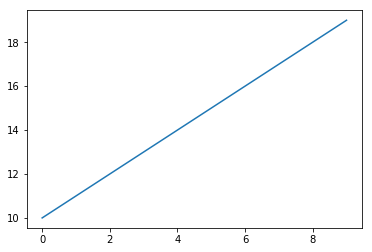

In [69]:
plt.plot(ten_twenty_range)

What does this do? It seems like the y-axis roughly follows the range of the data (between 10 and 20). Since we only provided a single 1-D array, the function will use the indices of that array as the values for the x-axis, and so it starts at 0, counting the data points in increments of 1 (zeroth value, first value, second value, etc).

Although this line looks continuous, the data it represents is really just 10 discrete points. To visualize this, we can tell the `plt.plot` function to draw the points of the data using an `x`. To do this, we'll give a `format` string to the function. The default format is `'-'`, which means draw a continuous line. So we'll add an `x` to the format, telling `plt.plot` to draw both a continuous line and the `x`s by giving it `'x-'`. 

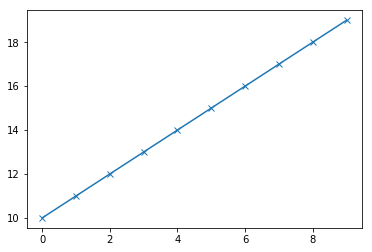

In [70]:
plt.plot(ten_twenty_range, 'x-')

If we give `plt.plot` two 1-D arrays, it will use the first array as the values for the x axis, and the second array as the values for the y-axis. Let's see this by giving a range that goes from 100-110:

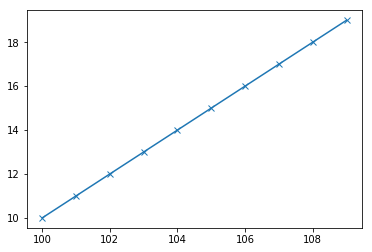

In [71]:
fake_xaxis = np.arange(100, 110)
plt.plot(fake_xaxis, ten_twenty_range, 'x-')

Notice that the plot looks exactly the same! What has changed? Well, only the labels on the x-axis have changed, which changes the meaning of the plot.

### Plotting voxel time courses

Now that we have line plot basics down on simple data, let's link back our efforts to analyze fMRI data. Let's plot the timecourse we were using above.

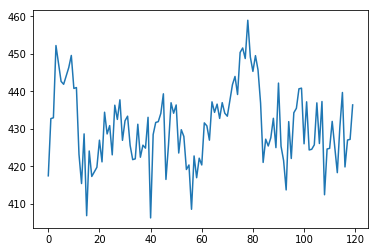

In [72]:
plt.plot(timeseries)

<a id='Axis_Labels'></a>
This plot gives us an idea of how the BOLD signal changes over the time course of a single scan (or run). This plot is missing something, however. We don't know what the numbers represent, and so it's impossible to draw meaning from this plot. 

To give the plot meaning, we can simply add a label to both the x and y axes that describe what the data represents. To do so, we use the `plt.xlabel` and `plt.ylabel` functions:

Text(0,0.5,'BOLD Signal (a.u.)')

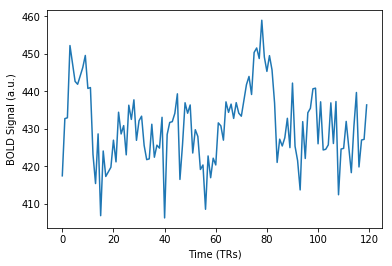

In [73]:
plt.plot(timeseries)
plt.xlabel('Time (TRs)')
plt.ylabel('BOLD Signal (a.u.)')

Now we see that x-axis represents time in TRs. Axis labels should always say what the data represents, and give the units that data was recorded in within parentheses. The y-axis represents the BOLD signal, but as we learned in the first lecture, this signal does not have any units. Scientists use `a.u.` as the abreviation for **Arbitrary Units** in these cases.

We said that this time is in TRs (or number of volumes collected), but it's often more interpretable to see this in "actual" time (measured in seconds) instead of TRs. To do this, you need to know how long the TR was. We happen to know for this data it was `2 seconds`, and so we can simply create a range that starts from zero, is the same length as the timeseries, and has a step size of `2`. Then we'll use that range as the x-axis values:

Text(0,0.5,'BOLD Signal (a.u.)')

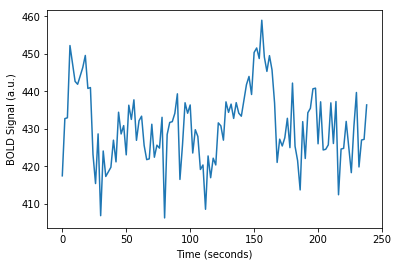

In [74]:
time = np.arange(0, len(timeseries) * 2, 2)
plt.plot(time, timeseries)
plt.xlabel('Time (seconds)')
plt.ylabel('BOLD Signal (a.u.)')

<a id='Plot_Title'></a>
It's also useful to describe what the overall intent and content of the plot is. To do this, we use `plt.title`.

Text(0.5,1,'BOLD Time-Series for a Voxel')

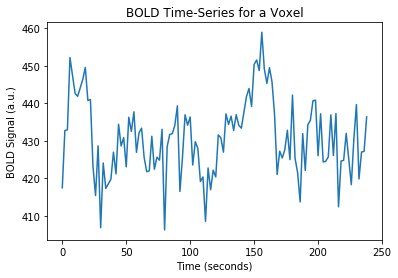

In [75]:
plt.plot(time, timeseries)
plt.xlabel('Time (seconds)')
plt.ylabel('BOLD Signal (a.u.)')
plt.title('BOLD Time-Series for a Voxel')

<a id='Histograms'></a>
## Histograms

The old adage goes, "A picture is worth a thousand words". In this case, it may be worth a thousand numbers. A histogram lets you see how the values in an array are *distributed* across a number of ranges. These ranges are called **bins**. We can define the number of bins, and the range each bin represents, for a  given histogram.  Let's see how we can use histograms to get a better idea of what the *distrbution* of our data "looks" like.

Let's take a look at how histograms work and how to interpret them on the time series data we just plotted above.

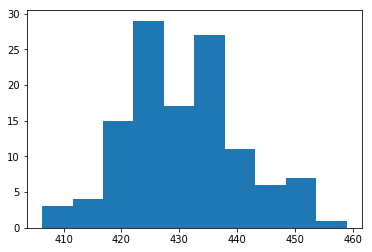

In [76]:
h = plt.hist(timeseries, bins=10)

This is a histogram, but where do these numbers come from? Let's look at a series of plots that will hopefully give you a better intuition for what these bars mean. There is some more advanced code in the following cells that we're using just for these plots that you will not be expected to know, so just concentrate on the plots, not the code!

This first plot shows the time series line plot, but adds circles at every time point. It also breaks up the line plot into 10 horizontal sections, using 11 horizontal lines. These horizontal sections have the same range as the 10 histogram ranges in the plot above.

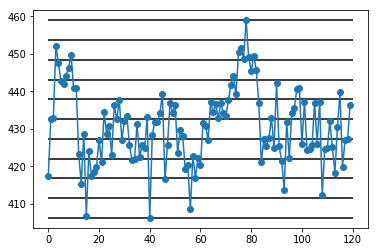

In [83]:
bins = np.linspace(np.min(timeseries), np.max(timeseries), 11)
plt.plot(timeseries, 'o-')
plt.hlines(bins, 0, len(timeseries))

Now let's remove the line and just show each point of the timeseries as a circle, the same circles as in the plot above.

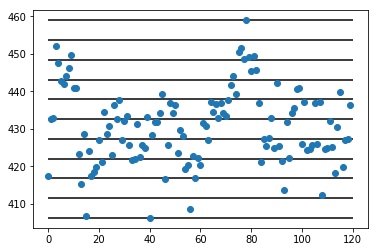

In [84]:
plt.plot(timeseries, 'o')
plt.hlines(bins, 0, len(timeseries))

Finally, we'll rotate the plot 90 degrees, making the horizontal lines vertical. Now we can simply count the number of circles in each region, and that's what the histogram represents!

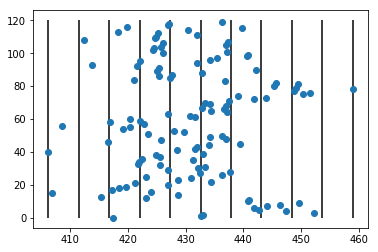

In [85]:
plt.plot(timeseries, np.arange(len(timeseries)), 'o')
plt.vlines(bins, 0, len(timeseries))


Finally we'll plot the histogram behind this circle plot so you can see the full picture.

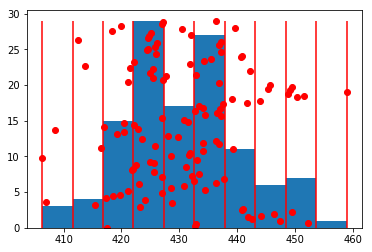

In [86]:
h = plt.hist(timeseries, bins)
bins2 = h[1]
plt.plot(timeseries, np.linspace(0, h[0].max(), len(timeseries)), 'ro')
plt.vlines(bins2, 0, h[0].max(), 'r')


### Breakout session

Now let's play with the number of bins in this breakout session.

- Plot histograms of `timeseries` with 3 bins, 20 bins and 100 bins.


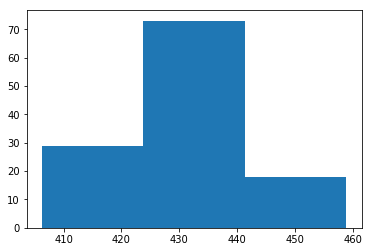

In [89]:
### STUDENT ANSWER

h = plt.hist(timeseries, bins=3)

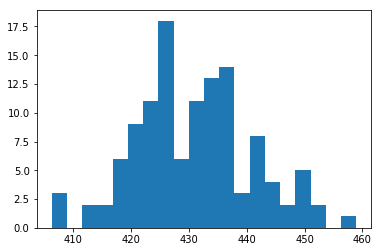

In [90]:
### STUDENT ANSWER

h = plt.hist(timeseries, bins=20)

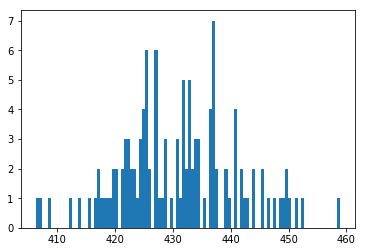

In [91]:
### STUDENT ANSWER
h = plt.hist(timeseries, bins=100)

<a id='reshape'></a>
### Transforming N-D arrays to 1-D arrays: `reshape()`

Often it is useful to take a histogram of an array that has more than one axis. For example, we might want to look at the *distribution* of voxel values for all the voxels in one 3-D volume. A histogram needs a 1-D array for plotting, and so we must convert a N-D array to a 1-D array before we can plot it as a histogram. To do this we will use `reshape()`. 

Let's see what `reshape` does on a simple 2-D example before moving to a 3-D fMRI volume:

In [92]:
array_2d = np.array([[1, 2, 3, 4, 5],
                     [6, 7, 8, 9, 10]])
print('Our example 2D array looks like:\n', array_2d)
print('And the shape is:\n', array_2d.shape)

Our example 2D array looks like:
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
And the shape is:
 (2, 5)


The `np.reshape` function can be used to do what it says, to reshape a numpy array into any other shape. So if we wanted to convert our data to have  5 rows and 2 columns, we could do that using `np.reshape`:

In [93]:
print(array_2d.reshape(5,2))

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


Note that this is **NOT** the same as transposing the array, even though both have the same size!!

In [94]:
print(array_2d.T)

[[ 1  6]
 [ 2  7]
 [ 3  8]
 [ 4  9]
 [ 5 10]]


Transposing is switching columns for lines, or in N dimensions interchanging different axes, whereas reshaping does not reorder the array entries, and instead just forces them into the new shape provided the number of elements in the new shape is the same as the number of elements in the old one.

So what we really want to use reshape to do in this case is convert this 2-D array into a 1-D array, and for that we'll use a feature of `np.reshape` that will do some calculations for us. If we give it a `-1` for the shape of an axis, it will figure out how many elements need to be in that axis. If we're reshaping to only have one axis, then it's easy, we just give `np.reshape` a `-1`!

In [95]:
array_1d = array_2d.reshape(-1)
print(array_1d)

[ 1  2  3  4  5  6  7  8  9 10]


So how does `reshape(-1)` rearrange the data elements in the array?

It turns a 2-D array (or any higher dimensional array) into a 1-D array by collapsing all the rows, one after another. This means that if we first transpose our 2-D array, and then `reshape(-1)` it, we will get a different solution, as we can see below:

In [96]:
array_T_1d = array_2d.T.reshape(-1)
print(array_T_1d)

[ 1  6  2  7  3  8  4  9  5 10]


### Histograms of fMRI data
So now let's work with a real volume of fMRI data in the form of a 3-D array. We'll use `slicing` again to grab the 5th volume from the fMRI data we loaded at the beginning of class. Again, don't worry about the mechanics of this for now, we'll cover this in a couple of lectures.

In [97]:
volume_data = data[4,:,:,:]

In [98]:
volume_data.shape

(30, 100, 100)

Now let's turn this volume into a 1-D array.

In [99]:
data_1d = volume_data.reshape(-1)

In [100]:
data_1d.shape

(300000,)

Now we're reading to plot the histogram of the fMRI data. We'll also set the x-axis label and y-axis labels so the plot is interpretable.

Text(0,0.5,'count of measurements')

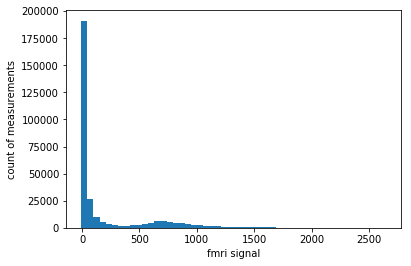

In [101]:
plt.hist(data_1d, bins=50)
plt.xlabel('fmri signal')
plt.ylabel('count of measurements')

### Breakout session:

- What does this tell you about the data? 
- Why are there so many zeros?

In [102]:
### STUDENT ANSWER

<a id='Bar_Plots'></a>
## Bar plots

Bar plots are used to plot the magnitude of multiple values of *dissimilar* data. To illustrate how to use them, we will create some data, as bar plots are not appropriate for plotting a timeseries. As we saw in the discussion above, the `weights` for a voxel are a type of *dissimilar* data.  Weights can be plotted in a bar plot very nicely. 

Let's create 5 "fake" weights, and give each one of them names as you'll see below.

In [103]:
voxel_weights = np.array([4.2, 2.4, 0.2, -.34,  .64])
weight_names = ['Faces', 'Body', 'Object', 'Scrambled', 'Places']

A bar plot takes 2 arrays. The first one provides the location on the x-axis, and the second one provides the height of each bar on the y-axis. For the x-axis we just want the values to increase, and so we'll create a range of 5 numbers, one for each weight. Then let's make the plot using `plt.bar`.

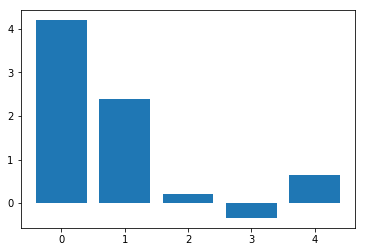

In [104]:
barplot_indices = np.arange(5)
_ = plt.bar(barplot_indices, voxel_weights)

Now we need to add some labels to make this plot interpretable. In addition to the axis labels and plot title, it would also be nice to change the numbers on the x-axis to meaningful text words, in this case the names of the weights. To do that we'll use `plt.xticks`:

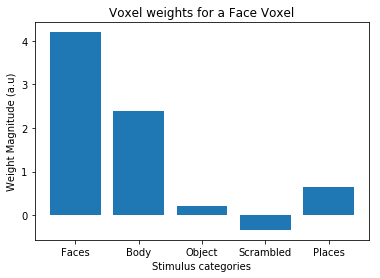

In [105]:
plt.bar(barplot_indices, voxel_weights)
plt.title("Voxel weights for a Face Voxel")
plt.ylabel("Weight Magnitude (a.u)")
plt.xlabel("Stimulus categories")
_ = plt.xticks(barplot_indices, weight_names)

You may have noticed that bar plots look very similar to histograms, and in fact if we change the `rwidth` of a histogram, they can be identical! Here we'll make a histogram of the same timeseries data from above, using 5 bins and specifying a `rwidth` of .8, which is what the `plt.bar` uses.

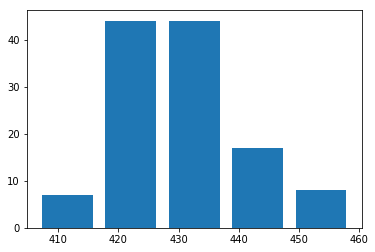

In [106]:
_ = plt.hist(timeseries, bins=5, rwidth=.8)

So you can see how important axis labels, plot titles and xticks can be in interpreting a plot!